In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [145]:
DATADIR = "/cellar/users/snwright/Data/Transfer/rat/"
datafile = "BMI_genes_all_z_scores.tsv" # uploaded as "BMI_genes_all_z_scores.tsv"
do_plots = False

In [146]:
# load data, contains original subgraphs
data = pd.read_csv(DATADIR + datafile, sep = "\t", index_col=0)
data.head()

,z_rat,z_human,z_both,SubGraph,rat_seed,human_seed
UBE2Q1,-1.046722,-0.059048,0.061807,None,0,0
RNF14,0.246439,-0.413490,-0.101900,None,0,0
UBE2Q2,0.128908,-0.090295,-0.011640,None,0,1
TMCO1,1.451465,-0.319948,-0.464393,rat-only,0,0
UBAC1,-0.464716,1.268305,-0.589401,human-only,0,0


In [157]:
# set thresholds:
conserved = {"rat":1, "human":1, "combo":3}
rat_only = {"rat":1, "human":0.5, "combo":-2}
human_only = {"rat":0, "human":1.5, "combo":-3}

Original SubGraph designations come from thresholds:  
`conserved = {"rat":1, "human":1, "combo":3}`  
`rat_only = {"rat":1, "human":0.5, "combo":-1.5}`  
`human_only = {"rat":0.5, "human":1, "combo":-1.5}`

**Combo scores are used as follows:**  

  
Conserved: $z_{rat}\bullet z_{human} > combo$  
  
Rat Only: $z_{rat}\bullet (z_{human} - 1) < combo$  
  
Human Only: $(z_{rat}-1)\bullet z_{human} < combo$

## Conserved Network

In [148]:
data = data.assign(hue=["red" if ((data.z_rat[i] > conserved["rat"]) and 
                       (data.z_human[i] > conserved["human"]) and
                       (data.z_both[i] > conserved["combo"])) else "grey" for i in data.index])

In [149]:
if do_plots:
    fig, [ax1, ax2] = plt.subplots(1,2,figsize=(14,7))
    ax1.scatter(data=data, x="z_human", y="z_rat", color="hue", s=1, alpha=0.5)
    ax1.plot([(i+0.2)/10 for i in range(1,250)],[conserved["combo"] *10/(i+0.2) for i in range(1, 250)], color="blue")
    ax1.hlines(y=1, xmin=-5, xmax=25, color="blue", alpha=0.7)
    ax1.vlines(x=1, ymin=-5, ymax=25, color="blue", alpha=0.7)
    ax1.set_xlabel("Z_human")
    ax1.set_ylabel("Z_rat")
    ax1.set_xlim((-5, 28))
    ax1.set_ylim((-5, 28))
    ax1.spines['left'].set_position(('data', 0.0))
    ax1.spines['bottom'].set_position(('data', 0.0))
    ax1.spines['top'].set_position(('data', 0.0))
    ax1.spines['right'].set_position(('data', 0.0))
    _ = ax1.set_title("All genes")

# plot non-seeds only
    data_non_seed = data.loc[((data.rat_seed ==0) & (data.human_seed==0))]

    ax2.scatter(data=data_non_seed, x="z_human", y="z_rat", color="hue", s=1, alpha=0.5, zorder=0)
    ax2.plot([(i+0.2)/10 for i in range(1,250)],[conserved["combo"]*10/(i+0.2) for i in range(1, 250)], color="orange", zorder=1)
    ax2.hlines(y=1, xmin=-5, xmax=6, color="darkorchid", alpha=0.9)
    ax2.vlines(x=1, ymin=-5, ymax=6, color="deepskyblue", alpha=0.7)
    ax2.text(s=str(conserved["human"])+" < Z_human", x=1.2, y=-4, color="deepskyblue")
    ax2.text(s=str(conserved["rat"])+" < Z_rat", x=-5, y=1.3, color="darkorchid")
    ax2.text(s=str(conserved["combo"])+" < Z_rat*Z_human", x=0.5, y=7, color="orange")
    #plt.xlabel()
    ax2.set_ylabel("Z_rat", loc="top")
    ax2.set_xlim((-5, 8))
    ax2.set_ylim((-5, 8))
    ax2.spines['left'].set(position=('data', 0.0), zorder=2)
    ax2.spines['bottom'].set(position=('data', 0.0), zorder=2)
    ax2.set_xlabel("Z_human", zorder=4, loc="right")
    ax2.spines['top'].set_position(('data', 0.0))
    ax2.spines['right'].set_position(('data', 0.0))
    _ =ax2.set_title("No seed genes")


## Rat Only and Human Only Networks

In [150]:
data_rat = data.assign(hue = ["darkorchid" if data.z_rat[i] > rat_only["rat"] and data.z_human[i] < rat_only["human"] and 
                              data.z_rat[i] * (data.z_human[i] - 1) < rat_only["combo"]
                              else data.hue[i] for i in data.index])

data_human = data.assign(hue = ["deepskyblue" if data.z_human[i] > human_only["human"] and data.z_rat[i] < human_only["rat"] and 
                                    (data.z_rat[i]-1)*(data.z_human[i]) < human_only["combo"]
                                    else data.hue[i] for i in data.index])

In [151]:
if do_plots:
    fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(14,7))
    ax1.scatter(data=data_rat, x="z_human", y="z_rat", color="hue", s=1, alpha=0.5, zorder=0)
    ax1.plot([(i+0.0001)/10 for i in range(-248,10)],[rat_only["combo"]*10/(i-10+0.0001) for i in range(-248, 10)], color="orange", zorder=1)
    #plt.plot([(i+0.2)/10 for i in range(1,250)],[30/(i+0.2) for i in range(1, 250)], color="orange", zorder=1)
    ax1.hlines(y=1, xmin=-5, xmax=6, color="purple", alpha=1)
    ax1.vlines(x=0.5, ymin=-5, ymax=25, color="deepskyblue", alpha=0.7)
    ax1.text(s="Z_human < "+str(rat_only["human"]), x=-4, y=-4, color="deepskyblue")
    ax1.text(s="Z_rat > "+str(rat_only["rat"]), x=-5, y=1.3, color="purple")
    ax1.text(s="Z_rat*(Z_human-1) < "+str(rat_only["combo"]), x=2, y=13, color="orange", fontsize=12)
    #plt.text(s="Z_rat*Z_human > 3", x=0.5, y=7, color="orange")
    #plt.xlabel()
    ax1.set_ylabel("Z_rat", loc="top")
    ax1.set_xlim((-5, 8))
    ax1.set_ylim((-5, 25))
    ax1.spines['left'].set(position=('data', 0.0), zorder=2)
    ax1.spines['bottom'].set(position=('data', 0.0), zorder=2)
    ax1.set_xlabel("Z_human", zorder=4, loc="right")
    ax1.spines['top'].set_position(('data', 0.0))
    ax1.spines['right'].set_position(('data', 0.0))
    ax1.set_title("RAT ONLY")

# human only plot

    ax2.scatter(data=data_human, x="z_human", y="z_rat", color="hue", s=1, alpha=0.5, zorder=0)
    #plt.plot([(i+0.0001)/10 for i in range(-248,10)],[-15/(i-10+0.0001) for i in range(-248, 10)], color="blue", zorder=1)
    ax2.plot([(i+0.0001)/10 for i in range(0,250)],[human_only["combo"]*10/(i+0.0001)+1 for i in range(0, 250)], color="orange", zorder=1)
    ax2.hlines(y=0.5, xmin=-5, xmax=25, color="darkorchid", alpha=1)
    ax2.vlines(x=1, ymin=-5, ymax=25, color="blue", alpha=0.7)
    ax2.text(s=str(human_only["human"])+"< Z_human", x=1.2, y=-4, color="blue")
    ax2.text(s="Z_rat < "+str(human_only["rat"]), x=-8, y=0.8, color="purple")
    ax2.text(s="(Z_rat-1)*Z_human < "+str(human_only["combo"]), x=15, y=2, color="orange", fontsize=12)
    #plt.text(s="Z_rat*Z_human > 3", x=0.5, y=7, color="orange")
    #plt.xlabel()
    ax2.set_ylabel("Z_rat", loc="top")
    ax2.set_xlim((-5, 25))
    ax2.set_ylim((-5, 8))
    ax2.spines['left'].set(position=('data', 0.0), zorder=2)
    ax2.spines['bottom'].set(position=('data', 0.0), zorder=2)
    ax2.set_xlabel("Z_human", zorder=4, loc="right")
    ax2.spines['top'].set_position(('data', 0.0))
    ax2.spines['right'].set_position(('data', 0.0))
    ax2.set_title("HUMAN ONLY")


## Summary

In [152]:
data_all = data_rat.assign(hue = ["deepskyblue" if data_rat.z_human[i] > human_only["human"] and 
                                  data_rat.z_rat[i] < human_only["rat"] and 
                                    (data_rat.z_rat[i]-1)*(data_rat.z_human[i]) < human_only["combo"]
                                    else data_rat.hue[i] for i in data_rat.index])

In [153]:
if do_plots:
    fig, [ax1, ax2] = plt.subplots(1, 2,figsize=(14,7))

    ax1.scatter(data=data_all, x="z_human", y="z_rat", color="hue", s=1, alpha=0.5, zorder=0)
    ax1.text(s="Conserved", x=5, y=15, color="red")
    ax1.text(s="Rat-only", x=-9, y=10, color="darkorchid")
    ax1.text(s="Human-only", x=5, y=-4, color="deepskyblue")
    ax1.set_ylabel("Z_rat", loc="top")
    ax1.set_xlim((-5, 25))
    ax1.set_ylim((-5, 25))
    ax1.spines['left'].set(position=('data', 0.0), zorder=2)
    ax1.spines['bottom'].set(position=('data', 0.0), zorder=2)
    ax1.set_xlabel("Z_human", zorder=4, loc="right")
    ax1.spines['top'].set_position(('data', 0.0))
    ax1.spines['right'].set_position(('data', 0.0))
    ax1.set_title("All genes")

    ax2.scatter(data=data_all[((data_all.rat_seed ==0) & (data_all.human_seed==0))], x="z_human", y="z_rat", color="hue", s=1, alpha=0.5, zorder=0)
    ax2.text(s="Conserved", x=3, y=6, color="red")
    ax2.text(s="Rat-only", x=-4, y=4, color="darkorchid")
    ax2.text(s="Human-only", x=5, y=-4, color="deepskyblue")
    ax2.set_ylabel("Z_rat", loc="top")
    ax2.set_xlim((-5, 8))
    ax2.set_ylim((-5, 8))
    ax2.spines['left'].set(position=('data', 0.0), zorder=2)
    ax2.spines['bottom'].set(position=('data', 0.0), zorder=2)
    ax2.set_xlabel("Z_human", zorder=4, loc="right")
    ax2.spines['top'].set_position(('data', 0.0))
    ax2.spines['right'].set_position(('data', 0.0))
    ax2.set_title("No seed genes")

In [154]:
data_all["NewSubGraph"] = data_all["hue"].map({"grey":"None", "darkorchid":"rat-only", "deepskyblue":"human-only", "red":"conserved"})

NewSubGraph
None          16080
conserved       657
human-only     1395
rat-only        688
Name: hue, dtype: int64


Text(0.5, 1.0, 'Sub Graph Size')

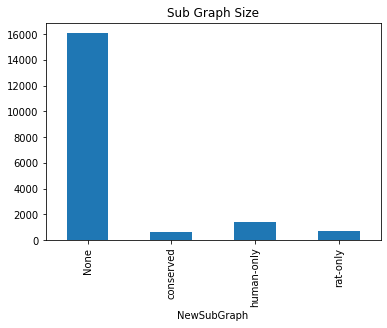

In [155]:
print(data_all.groupby("NewSubGraph").count().loc[:, "hue"])
data_all.groupby("NewSubGraph").count().loc[:, "hue"].plot.bar()
plt.title("Sub Graph Size")

Text(0.5, 1.0, 'Seed gene percentages')

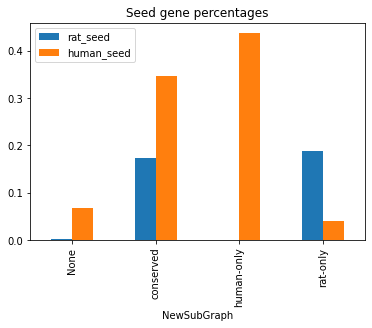

In [156]:
data_all.groupby("NewSubGraph").mean().loc[:, ("rat_seed", "human_seed")].plot.bar()
plt.title("Seed gene percentages")